In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
hotel_booking_data = pd.read_csv('hotel_bookings.csv')

In [3]:
hotel_booking_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
hotel_booking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
hotel_booking_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
hotel_booking_data.duplicated().sum()

31994

In [7]:
hotel_booking_data.drop_duplicates(inplace=True)

In [8]:
hotel_booking_data.shape

(87396, 32)

In [9]:
for feature in hotel_booking_data.columns:
    print(feature, hotel_booking_data[feature].nunique())

hotel 2
is_canceled 2
lead_time 479
arrival_date_year 3
arrival_date_month 12
arrival_date_week_number 53
arrival_date_day_of_month 31
stays_in_weekend_nights 17
stays_in_week_nights 35
adults 14
children 5
babies 5
meal 5
country 177
market_segment 8
distribution_channel 5
is_repeated_guest 2
previous_cancellations 15
previous_bookings_not_canceled 73
reserved_room_type 10
assigned_room_type 12
booking_changes 21
deposit_type 3
agent 333
company 352
days_in_waiting_list 128
customer_type 4
adr 8879
required_car_parking_spaces 5
total_of_special_requests 6
reservation_status 3
reservation_status_date 926


In [10]:
ctagorical_feature = []
for feature in hotel_booking_data.columns:
    if hotel_booking_data[feature].nunique() <54:
     print(feature, hotel_booking_data[feature].nunique())
     ctagorical_feature.append(feature)


hotel 2
is_canceled 2
arrival_date_year 3
arrival_date_month 12
arrival_date_week_number 53
arrival_date_day_of_month 31
stays_in_weekend_nights 17
stays_in_week_nights 35
adults 14
children 5
babies 5
meal 5
market_segment 8
distribution_channel 5
is_repeated_guest 2
previous_cancellations 15
reserved_room_type 10
assigned_room_type 12
booking_changes 21
deposit_type 3
customer_type 4
required_car_parking_spaces 5
total_of_special_requests 6
reservation_status 3


In [11]:
ctagorical_feature

['hotel',
 'is_canceled',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'customer_type',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status']

C:\Users\Mayur\AppData\Local\Temp\ipykernel_17076\663098181.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hotel_booking_data,x=feature,palette=['red','yellow','blue','green'])
C:\Users\Mayur\AppData\Local\Temp\ipykernel_17076\663098181.py:5: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(data=hotel_booking_data,x=feature,palette=['red','yellow','blue','green'])
C:\Users\Mayur\AppData\Local\Temp\ipykernel_17076\663098181.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hotel_booking_data,x=feature,palette=['red','yellow','blue','green'])
C:\Users\Mayur\AppData\Local\Temp\ipykernel_17076\663098181.py:5: Use

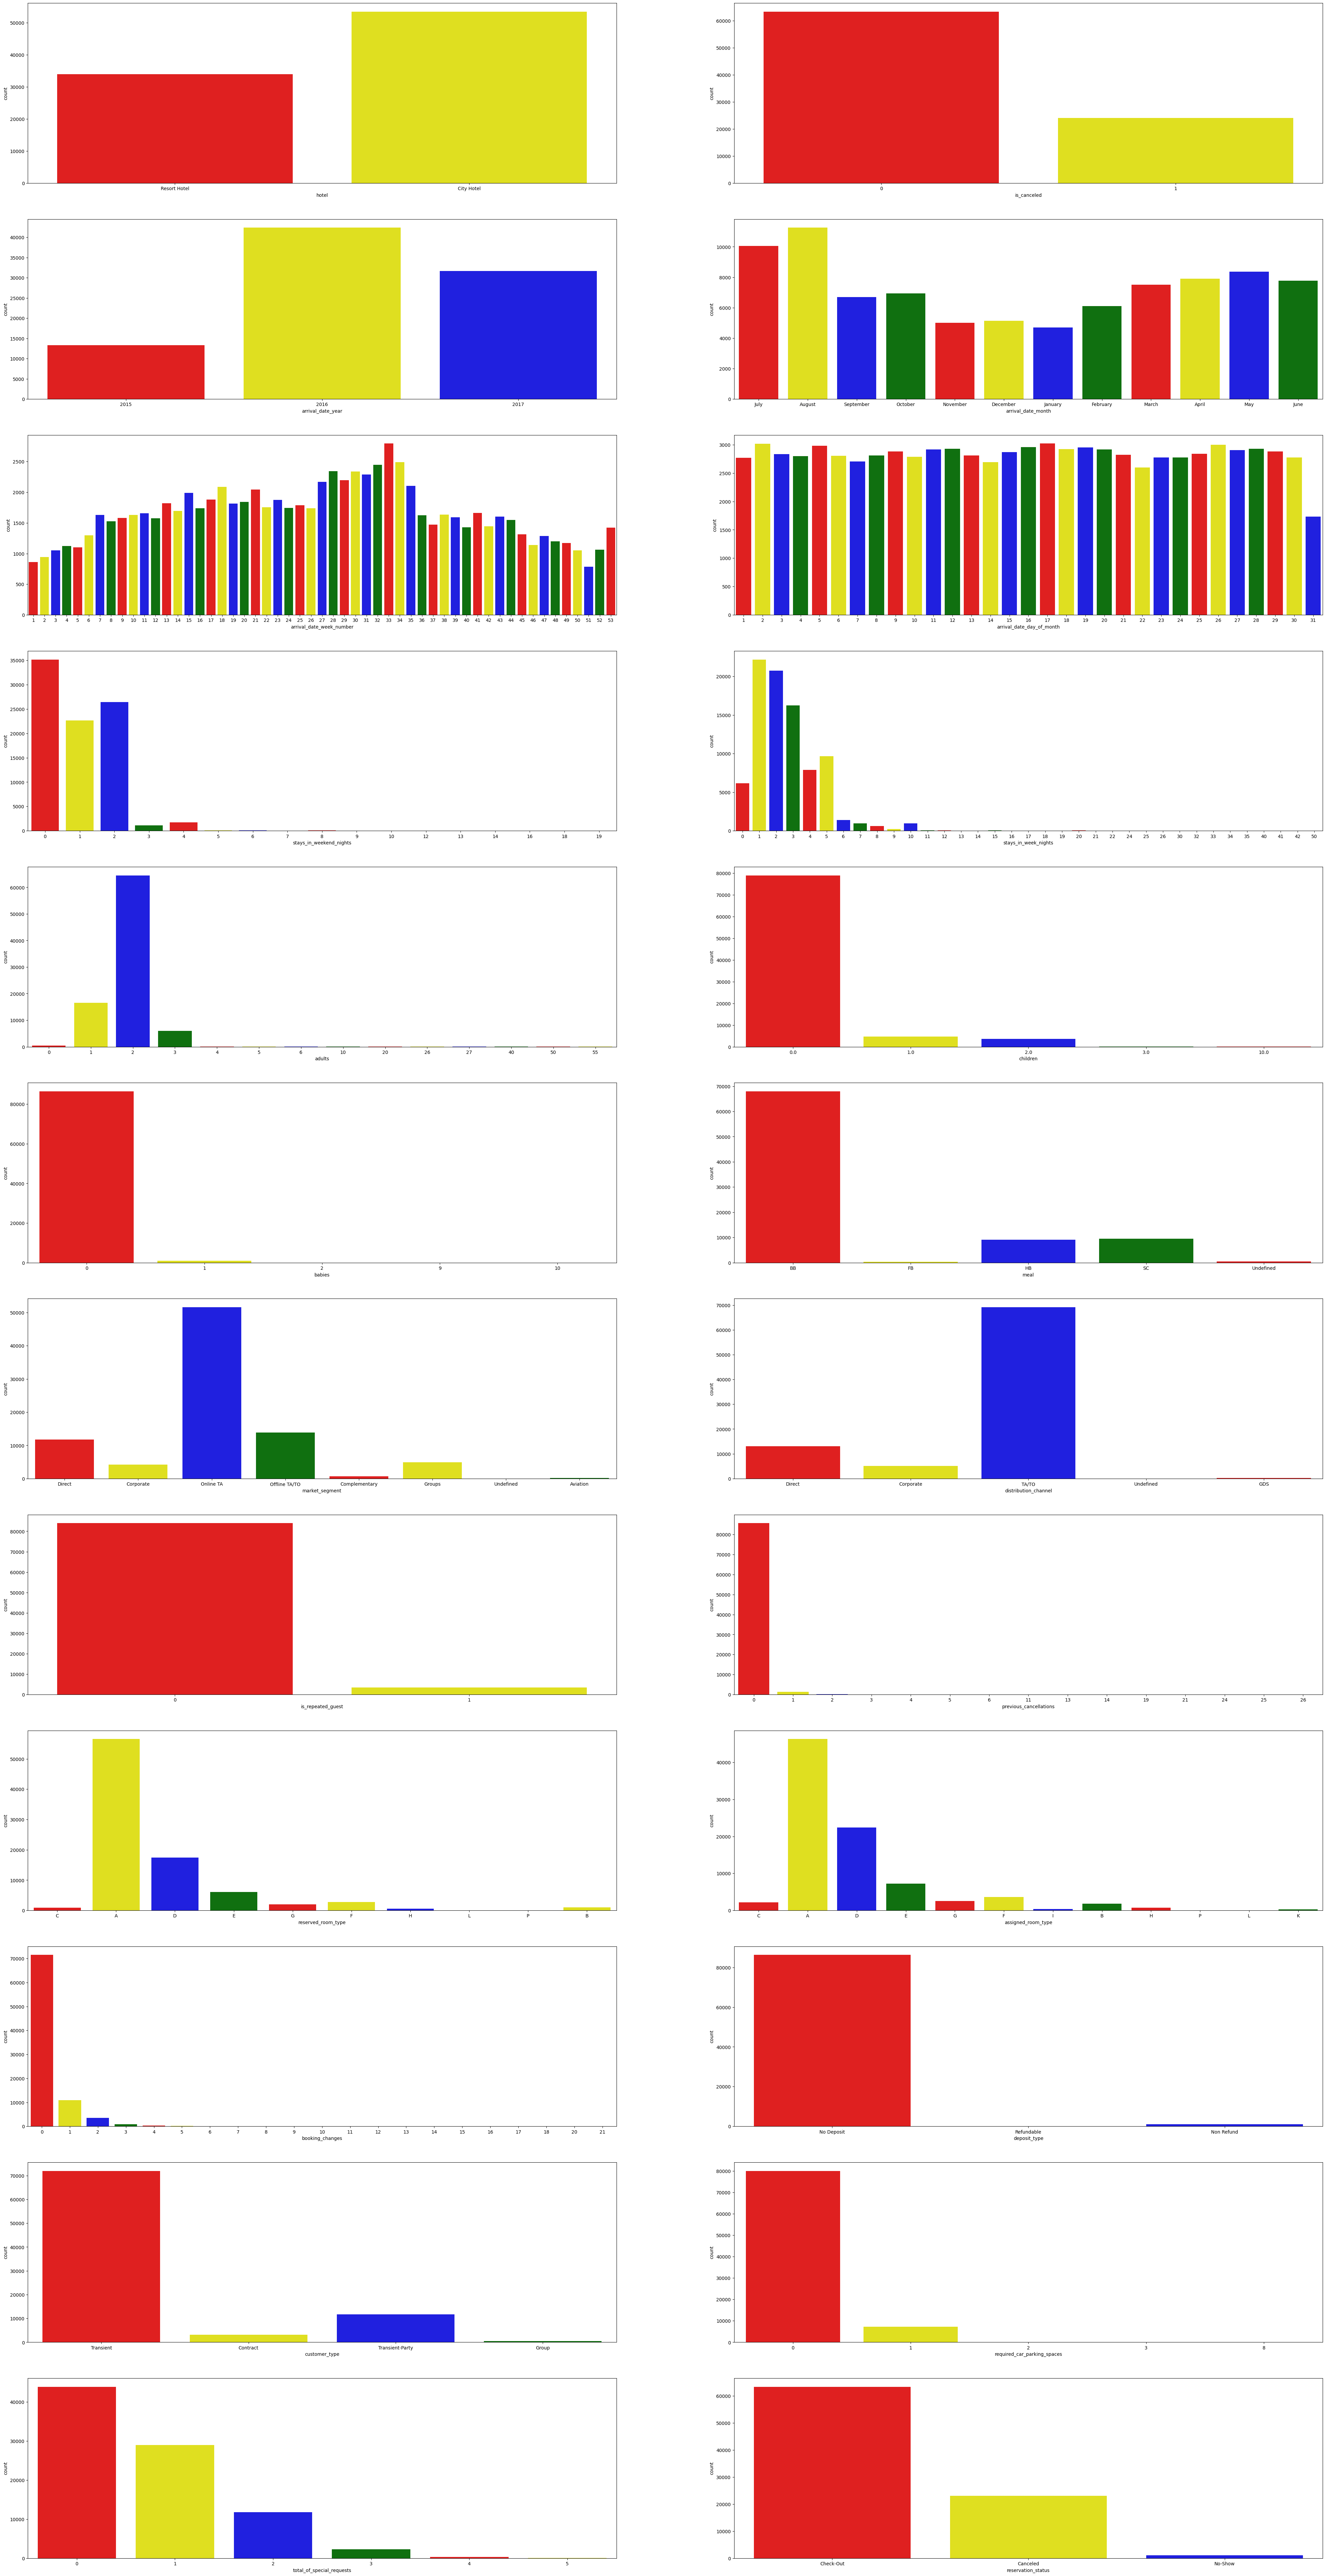

In [12]:
plt.figure(figsize=(50,200))
plot_no = 1
for feature in ctagorical_feature:
    plt.subplot(len(ctagorical_feature),2,plot_no)
    sns.countplot(data=hotel_booking_data,x=feature,palette=['red','yellow','blue','green'])
    plot_no+=1

<Axes: xlabel='country', ylabel='count'>

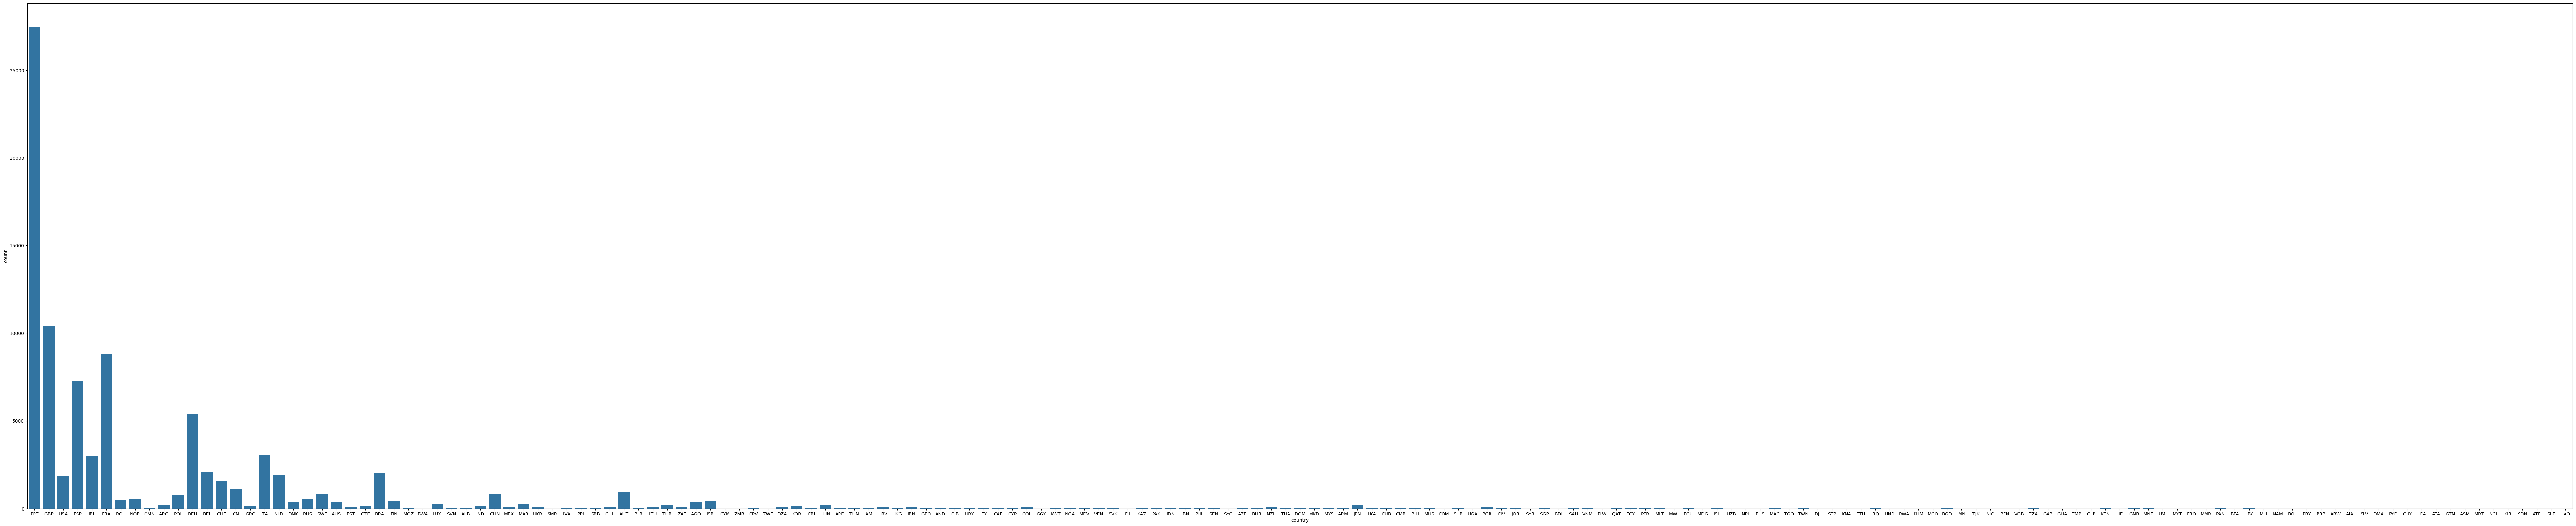

In [13]:
plt.figure(figsize=(100,20))
sns.countplot(data=hotel_booking_data,x='country')

c:\Users\Mayur\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


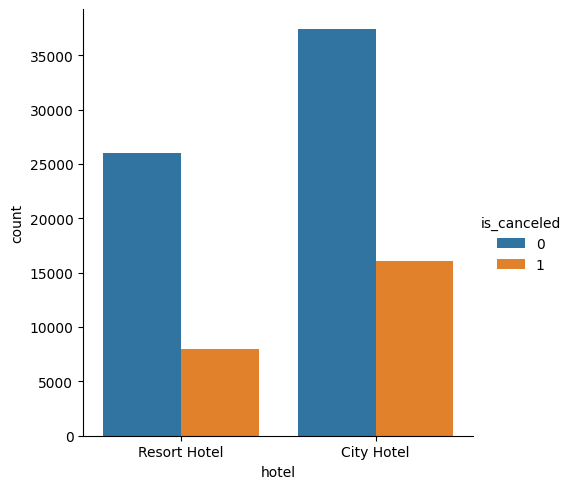

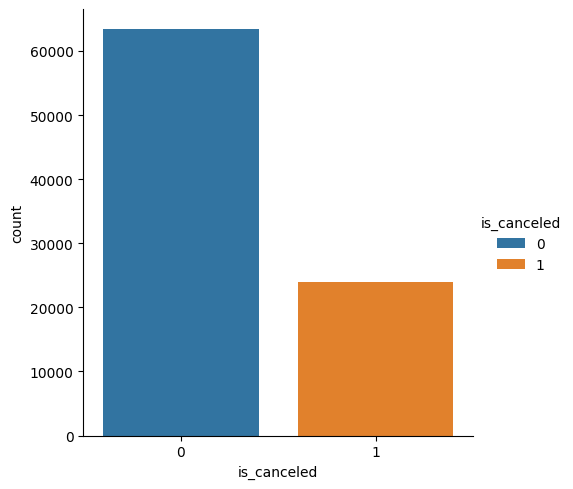

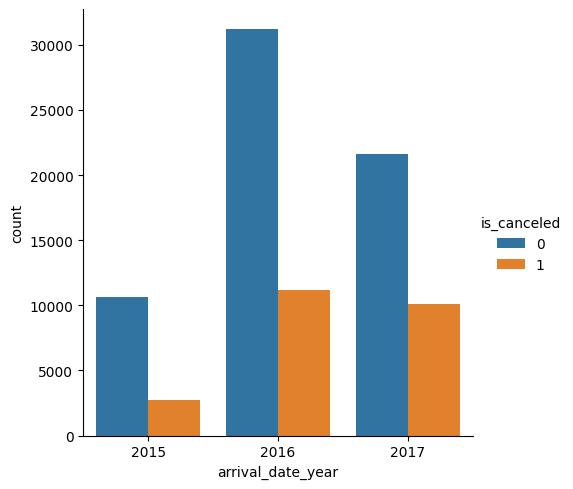

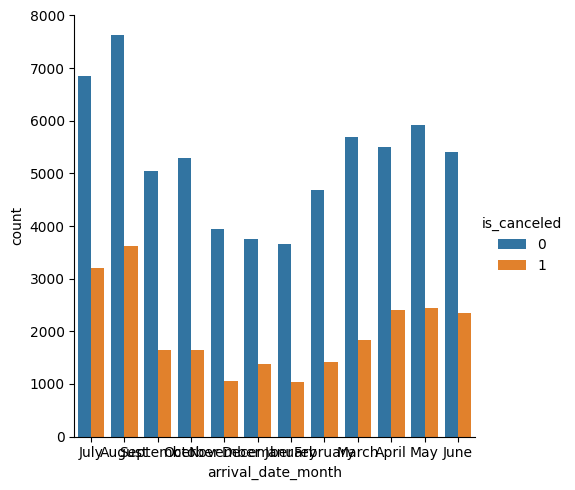

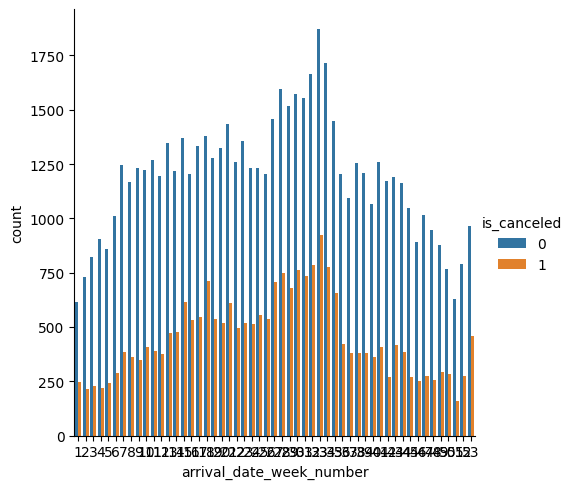

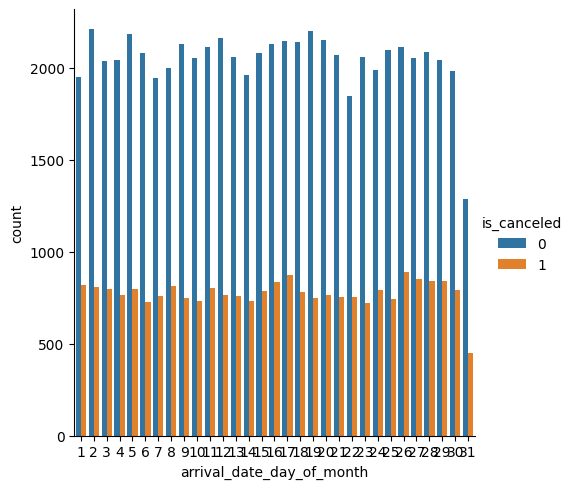

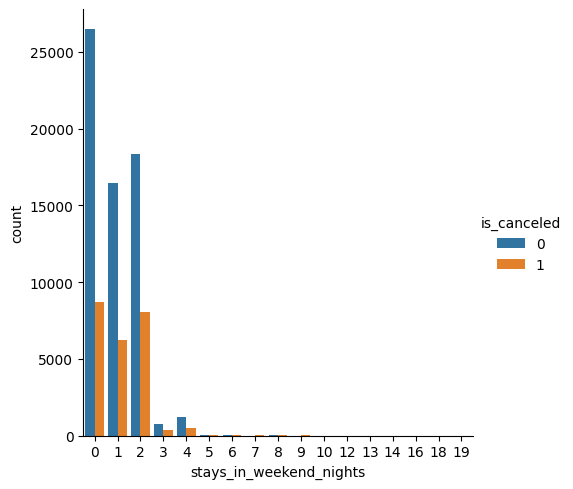

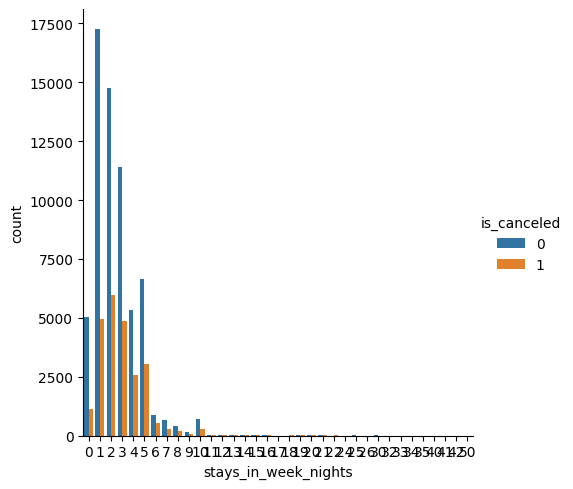

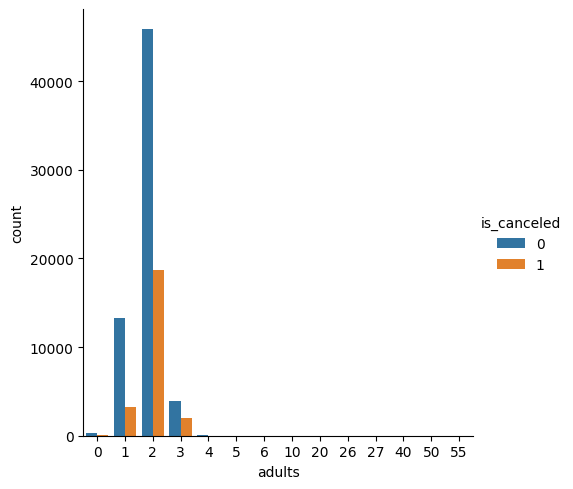

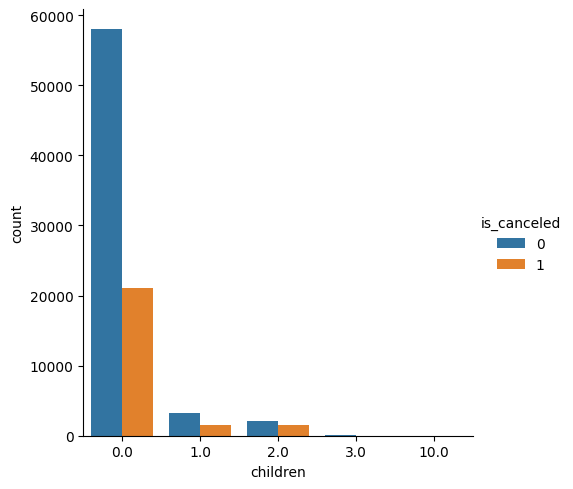

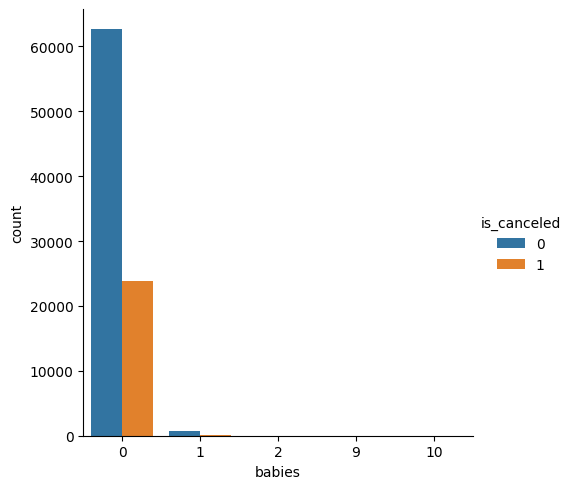

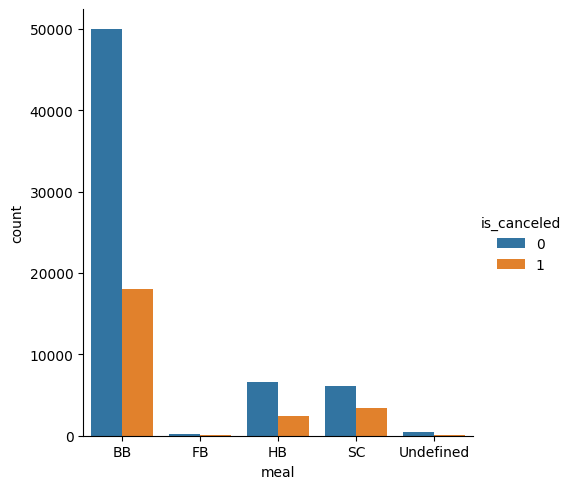

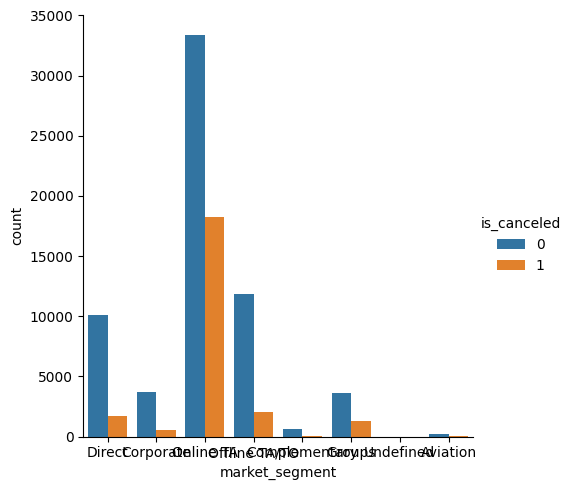

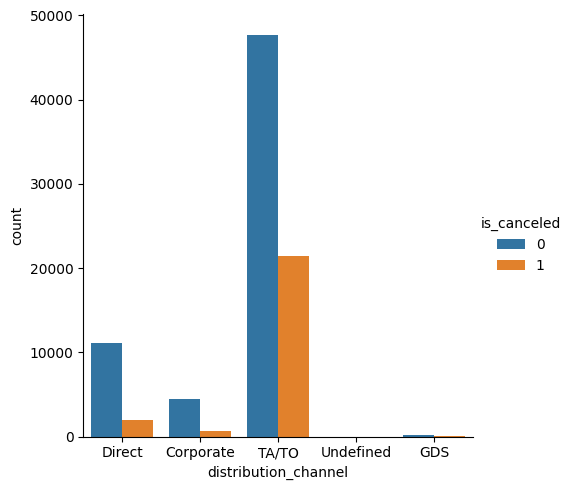

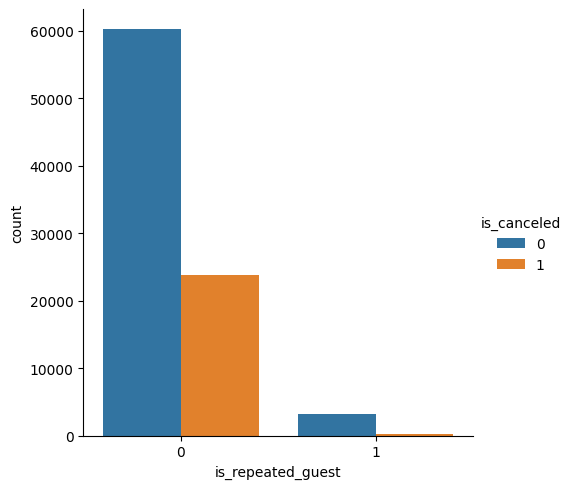

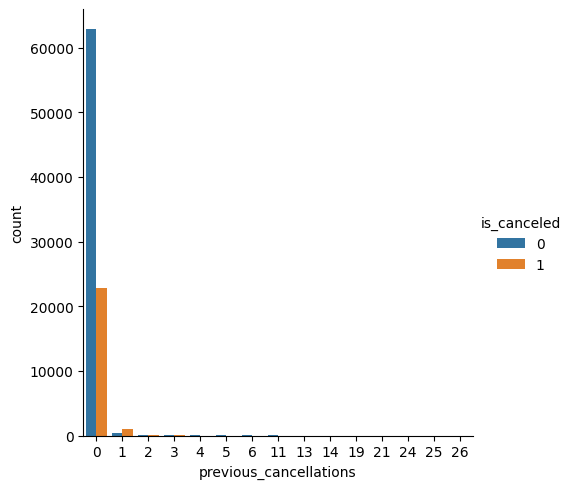

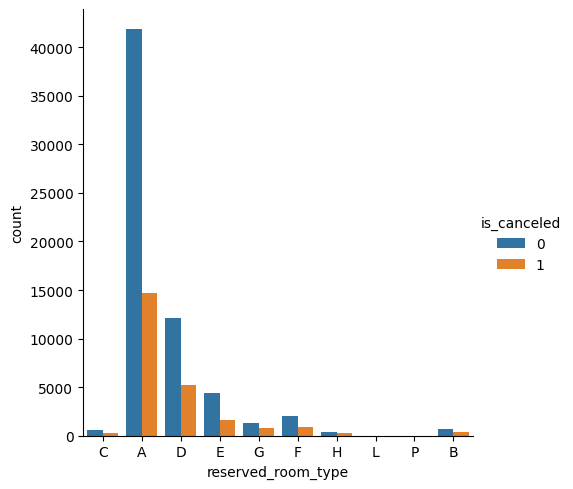

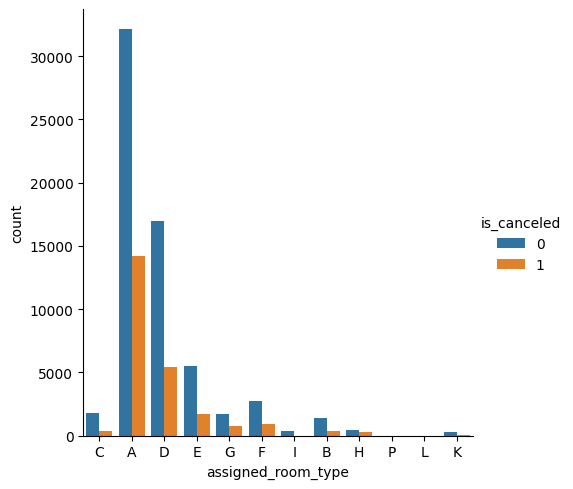

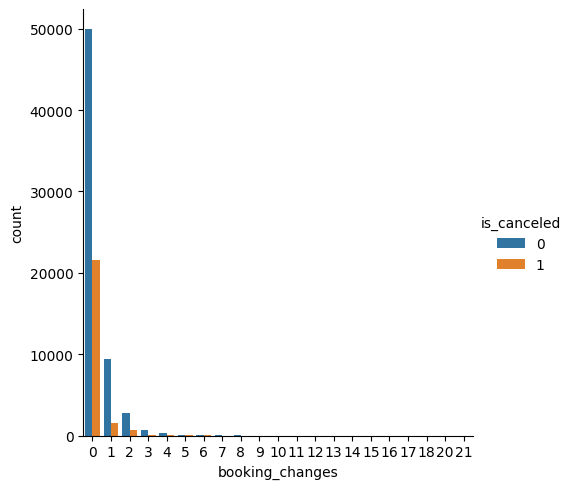

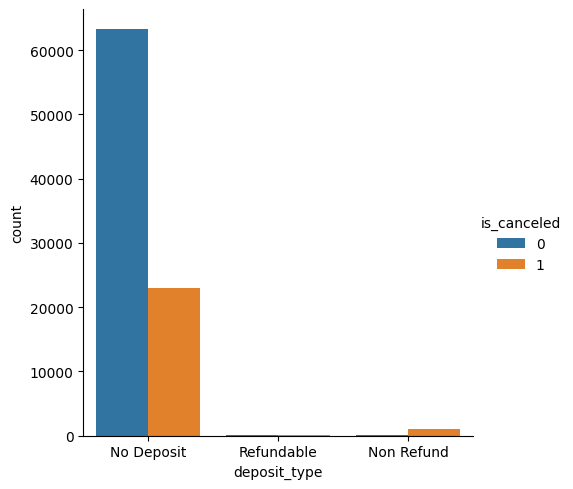

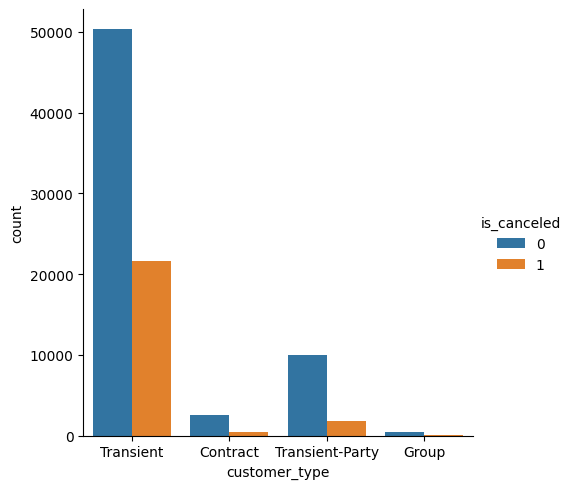

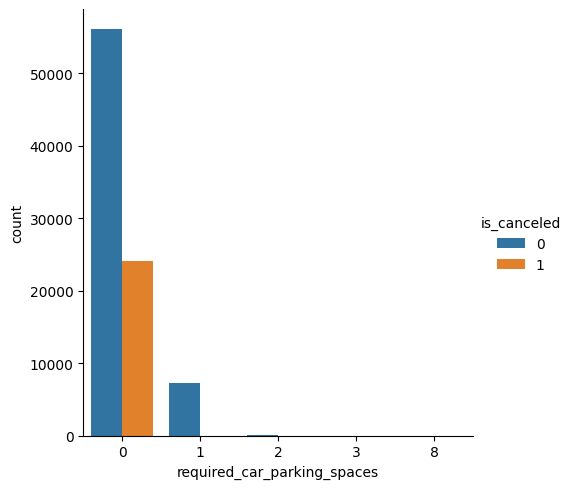

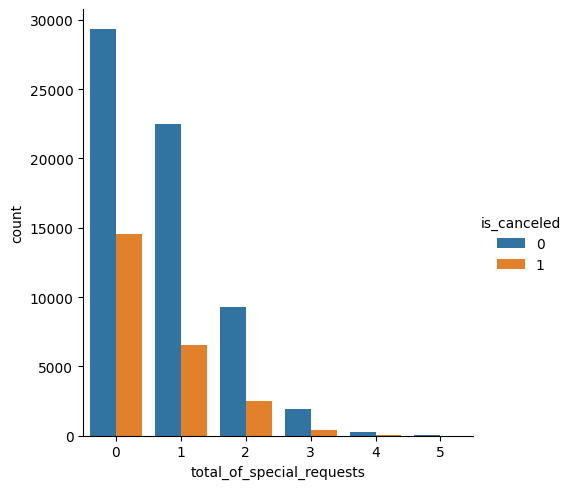

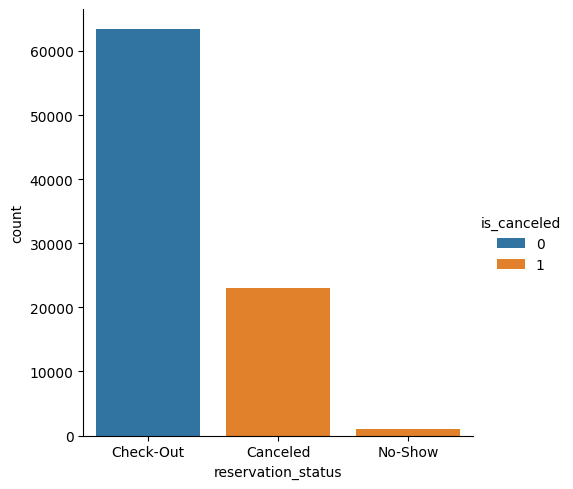

In [14]:
for feature in ctagorical_feature:
    sns.catplot(data=hotel_booking_data,x=feature,kind='count',hue='is_canceled')

In [54]:
hotel_booking_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [55]:
new_df = hotel_booking_data.drop(['reservation_status_date','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','company'],axis=1)

In [56]:
new_df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0


In [57]:
new_df['country'] = new_df['country'].fillna('PRT')
new_df['agent'] = new_df['agent'].fillna(new_df['agent'].median())
new_df['children'] = new_df['children'].fillna(0)

In [58]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(new_df[['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status']]).toarray()

In [59]:
new_df.select_dtypes(include=['object']).columns

Index(['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status'],
      dtype='object')

In [60]:
encoded_data = pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out(['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status']))

In [86]:
encoded_data = encoded_data.reset_index(drop=True)
new_data = pd.concat([new_df,encoded_data],axis=1)

In [91]:
new_data.select_dtypes(include=['object']).columns

Index(['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status'],
      dtype='object')

In [92]:
new_data = new_data.drop(new_data.select_dtypes(include=['object']).columns,axis=1)

In [95]:
new_data.head()

,is_canceled,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,0,342,2015,0,0,2,0.0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,737,2015,0,0,2,0.0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0,7,2015,0,1,1,0.0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,13,2015,0,1,1,0.0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0,14,2015,0,2,2,0.0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [99]:
X = new_data.drop(['is_canceled'],axis=1)
Y = new_data['is_canceled']

In [101]:
Y.value_counts()

is_canceled
0    63371
1    24025
Name: count, dtype: int64

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.8,random_state=42)


In [103]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [105]:
y_resampled.value_counts()

is_canceled
1    50638
0    50638
Name: count, dtype: int64

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [114]:
model = LogisticRegression()
model.fit(X_resampled,y_resampled)

c:\Users\Mayur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [115]:
y_prediction = model.predict(X_test)

In [117]:
accuracy_score(y_test,y_prediction)

0.9971395881006865

In [119]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12733
           1       1.00      0.99      0.99      4747

    accuracy                           1.00     17480
   macro avg       1.00      1.00      1.00     17480
weighted avg       1.00      1.00      1.00     17480



In [120]:
confusion_matrix(y_test,y_prediction)

array([[12726,     7],
       [   43,  4704]], dtype=int64)

In [124]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(model, X_resampled,y_resampled, cv=cv, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))


c:\Users\Mayur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Mayur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Cross-Validation Scores: [0.99856833 0.9966428  0.99792644 0.99787707 0.99501358]
Mean Accuracy: 0.9972056423764458


c:\Users\Mayur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross-Validation Scores: [0.99856833 0.9966428  0.99792644 0.99787707 0.99501358]


Mean Accuracy: 0.9972056423764458